## Import the needed package

In [1]:
# package to get the custom modules
import sys
# get the custom modules
sys.path.insert(0, './../../')
# package for handling files
import os
import pandas as pd
# import the needed path
from utilities import path_split_origin, path_split_augment, path_model
# import the needed custom function
from utilities import load_img_mask, create_dataset, custom_load_model, predict_model, split_disc_cup_mask, split_eyeside, visualize_result_eye_side, evaluate_eye_side
# package to handle random numbers
from random import randint

d:\Programming\Python\Env_storage\research_prof_anin\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
d:\Programming\Python\Env_storage\research_prof_anin\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter 

## Global Variable

In [2]:
# paths where dataset is stored
path_test_ori = os.path.join(path_split_origin, 'test')
path_test_aug = os.path.join(path_split_augment, 'test')

## Get Dataset

In [3]:
# get the image and mask files
test_ori_img, test_ori_mask = load_img_mask(path_test_ori)
test_aug_img, test_aug_mask = load_img_mask(path_test_aug)
# create the tensorflow dataset
testset_ori = create_dataset(test_ori_img, test_ori_mask, return_path=True)
testset_aug = create_dataset(test_aug_img, test_aug_mask, return_path=True)

In [4]:
# set the threshold value
treshold = .76

## Classify Eye Side

In [5]:
result = {}
loop_var = {
    "unet_ori": [
        testset_ori,
        custom_load_model(os.path.join(path_model, f"unet_model_ori.h5")),
        treshold],
    "unet_aug": [
        testset_aug,
        custom_load_model(os.path.join(path_model, f"unet_model_aug.h5")),
        treshold],
    "mnet_ori": [
        testset_ori,
        custom_load_model(os.path.join(path_model, f"mnet_model_ori.h5")),
        treshold],
    "mnet_aug": [
        testset_aug,
        custom_load_model(os.path.join(path_model, f"mnet_model_aug.h5")),
        treshold],
    "efnet_ori": [
        testset_ori,
        custom_load_model(os.path.join(path_model, f"efnet_model_ori.h5")),
        treshold],
    "efnet_aug": [
        testset_aug,
        custom_load_model(os.path.join(path_model, f"efnet_model_aug.h5")),
        treshold],
}
for key, values in loop_var.items():
    result[key] = split_eyeside(values[0], values[1], values[2])
del loop_var

## Visualize

In [6]:
idx = randint(0, len(test_ori_img)-1)

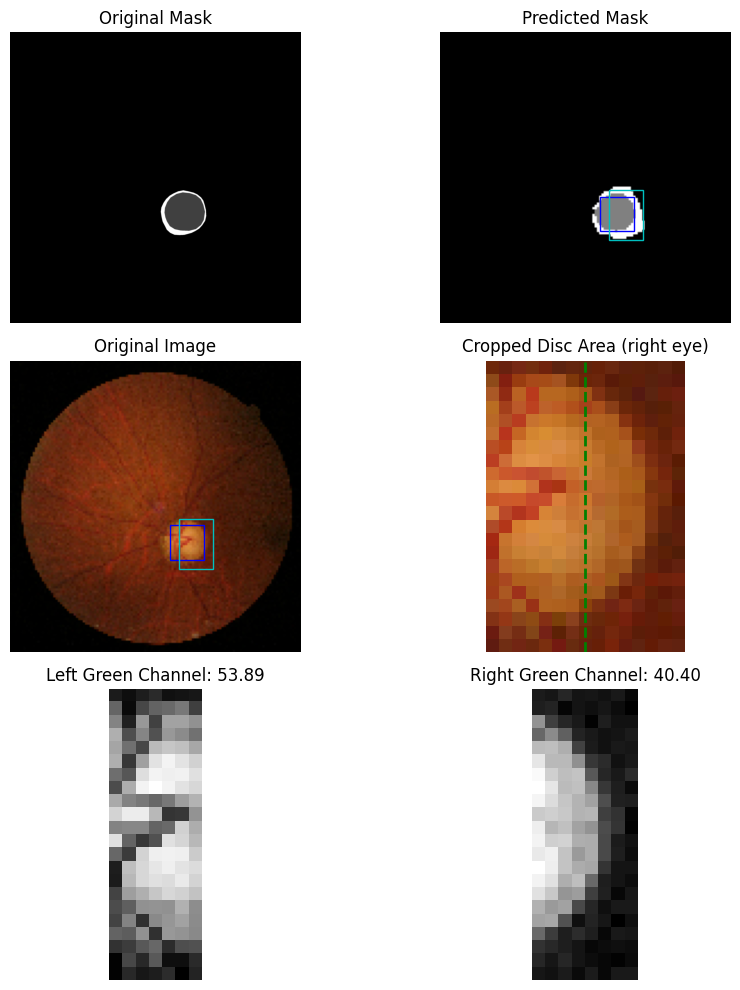

{'file_name': 'fff_1_12814_l_1.jpg',
 'pred_eye_side': 'right',
 'left_intensity': 53.88627624511719,
 'right_intensity': 40.396080017089844,
 'cup_bbox': (72, 70, 87, 85),
 'disc_bbox': (69, 74, 91, 89)}

In [7]:
visualize_result_eye_side(model=custom_load_model(os.path.join(path_model, f"unet_model_ori.h5")),
                        img_path=test_ori_img[idx],
                        mask_path=test_ori_mask[idx],
                        threshold=.76,)

## Evaluate

In [8]:
evaluation_result = {}
for key, value in result.items():
    pred_res = [v["pred_eye_side"] for v in value]
    real_res = [v["real_eye_side"] for v in value]
    evaluation_result[key] = evaluate_eye_side(pred_res, real_res)

In [9]:
df_eval = pd.DataFrame(evaluation_result)
df_eval.reset_index(inplace=True, names="metrics")
df_eval.iloc[:, 1:] = df_eval.iloc[:, 1:] * 100
df_eval.iloc[:, 1:] = df_eval.iloc[:, 1:].round(2)
df_eval

,metrics,unet_ori,unet_aug,mnet_ori,mnet_aug,efnet_ori,efnet_aug
0,accuracy,74.65,90.14,71.83,73.24,74.65,84.51
1,precision,73.17,85.37,75.61,85.37,78.05,87.80
2,recall,83.33,97.22,79.49,76.09,78.05,87.80
3,f1,77.92,90.91,77.50,80.46,78.05,87.80
